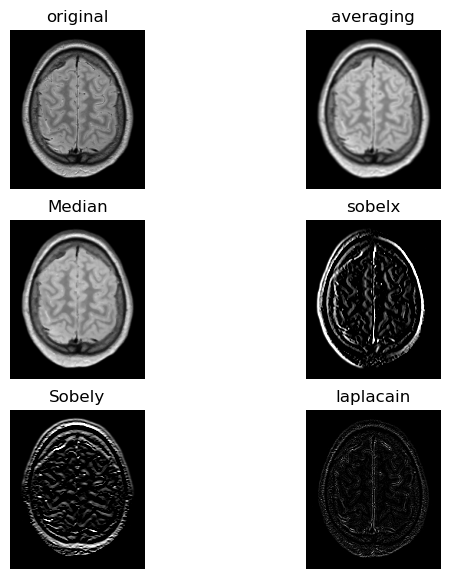

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# A
def filter_img(img , name):
    
    if (name == 'average'):
        avg = cv.blur(img , (3, 3))
        return avg
    
    if (name == 'median'): 
        med = cv.medianBlur(img, 3)
        return med
        
    if (name == 'sobel_x'): 
        sobelx = cv.Sobel(img,cv.CV_64F, 1, 0, ksize=3)  # x
        return sobelx
    
    if (name == 'sobel_y'): 
        sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)  # y
        return sobely
        
    if (name == 'laplacian'):
        lapkernel = np.array([[0, -1, 0],
                              [-1, 4,-1],
                              [0, -1, 0]])
        mask = cv.filter2D(img, -1, lapkernel)
        return mask

# B
img = cv.imread('MRI.png', 0)      

fig, ax = plt.subplots(3, 2, figsize = (7, 7))

ax = plt.subplot(3, 2, 1)
ax.set_title('original')
ax.imshow(img, cmap='gray')
ax.axis('off')

ax = plt.subplot(3, 2, 2)
ax.set_title('averaging')
ax.imshow(filter_img(img, 'average'), cmap='gray')
ax.axis('off')

ax = plt.subplot(3, 2, 3)
ax.set_title('Median')
ax.imshow(filter_img(img, 'median'), cmap='gray')
ax.axis('off')

ax = plt.subplot(3, 2, 4)
ax.set_title('sobelx')
ax.imshow(filter_img(img, 'sobel_x'), cmap='gray', vmin=0, vmax=255)
ax.axis('off')

ax = plt.subplot(3, 2, 5)
ax.set_title('Sobely')
plt.imshow(filter_img(img, 'sobel_y'), cmap='gray', vmin=0, vmax=255)
ax.axis('off')

ax = plt.subplot(3, 2, 6)
ax.set_title('laplacain')
ax.imshow(filter_img(img, 'laplacian'), cmap='gray', vmin=0, vmax=255)
ax.axis('off')

plt.show()

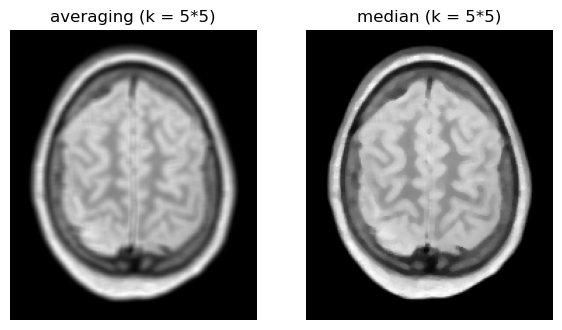

In [5]:
# C
med = cv.medianBlur(img ,5)
avg = cv.blur(img , (5,5))

fig, ax = plt.subplots(1, 2, figsize = (7, 7))

ax = plt.subplot(1, 2, 1)
ax.set_title('averaging (k = 5*5)')
ax.imshow(avg , cmap='gray')
ax.axis('off')

ax = plt.subplot(1, 2, 2)
ax.set_title('median (k = 5*5)')
ax.imshow(med, cmap='gray')
ax.axis('off')

plt.show()

212


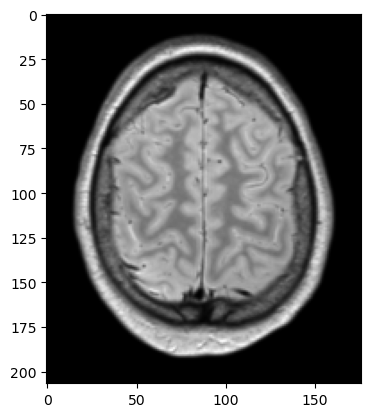

In [6]:
kernel = np.array([[1, 4, 1],
                   [4, 16,4],
                   [1, 4, 1]])

kernel = kernel / 36

out = cv.filter2D(img, -1, kernel)
print(np.max(out))

plt.imshow(out , cmap = 'gray')